In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [2]:
#Cargamos los datos
events = pd.read_csv('C:\\Users\\dev\\repos\\fiuba\\tp1_anlisis_exploratorio\\events.csv', low_memory = False)
#Cabecera
events.head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#descarto las que no me interesan
events.drop(columns=['channel','condition','storage','color','campaign_source','search_engine','url','staticpage','skus','search_term','device_type','browser_version','operating_system_version','screen_resolution','new_vs_returning'],inplace=True)
#convierto los tipos
events.event = events.event.astype('category')
events.model = events.model.astype('category')
events.city = events.city.astype('category')
events.region = events.region.astype('category')
events.country = events.country.astype('category')

In [4]:
#pongo de index al datetime y agrego columnas para segmentar el tiempo
events.timestamp = pd.to_datetime(events['timestamp'],format='%Y-%m-%d %H:%M:%S')
events.set_index(pd.DatetimeIndex(events.timestamp),inplace=True)
events.drop(columns='timestamp',inplace=True)
events['date'] = events.index.date
events['year'] = events.index.year
events['month'] = events.index.month
events['day'] = events.index.day
events['hour'] = events.index.hour
events['minute'] = events.index.minute
events['week'] = events.index.weekofyear
events['weekday'] = events.index.weekday # monday = 0, tuesday = 1...
events.sort_index(ascending=True,inplace=True)
events.head(1)

,event,person,sku,model,city,region,country,date,year,month,day,hour,minute,week,weekday
timestamp,,,,,,,,,,,,,,,
2018-01-01 07:32:26,ad campaign hit,9250d410,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018,1,1,7,32,1,0


In [5]:
#Si quisiera filtrar entre fechas:
#events = events[(events.index > '2018-05-01 00:00:00')]
#events = events[(events.index < '2018-06-01 00:00:00')]

#descarto hasta el 16-1 para emparejar y poder analizar por dia del mes
events = events[(events.index > '2018-01-16 00:00:00')]

In [6]:
def plot_heatmap(data,title='Titulo',xlabel='Leyenda X',ylabel='Leyenda Y'):
    plt.figure(figsize = (18,9))
    ax = sns.heatmap(data,linewidth = 3, cmap = 'Greens')
    ax.set_title(title,Fontsize = 20)
    ax.set_ylabel(xlabel,Fontsize = 18)
    ax.set_xlabel(ylabel,fontsize = 18)

In [ ]:
#todos los eventos, usuarios únicos, mes determinado
def heatmap_unique_users_between_dates(desde='2018-01-01 00:00:00',hasta='2018-07-01 00:00:00',title='Cantidad de usuarios únicos por hora y día del mes'):
    filtro = events[(events.index > desde)]
    filtro = filtro[(filtro.index < hasta)]
    per_date_total = filtro.groupby(['day','hour']).agg({'person':'nunique'}).unstack()
    per_date_total.columns = per_date_total.columns.droplevel(0)
    per_date_total.fillna(value=0,inplace=True)
    per_date_total = per_date_total.astype(dtype='int64')
    unique_users = per_date_total.transpose()
    unique_users.sort_index(ascending=False,inplace=True)
    plot_heatmap(unique_users,title,'Hora del Día','Día del mes')

In [7]:
#armo la tabla por evento por dia del año
per_event_datecount = events.groupby(['event','date']).agg({'date':'count'}).unstack()
per_event_datecount.columns = per_event_datecount.columns.droplevel(0)
per_event_datecount.fillna(value=0,inplace=True)
per_event_datecount = per_event_datecount.astype(dtype='int64')
#per_event_datecount

In [8]:
#armo la tabla por evento por semana
per_event_weekcount = events.groupby(['event','week']).agg({'week':'count'}).unstack()
per_event_weekcount.columns = per_event_weekcount.columns.droplevel(0)
per_event_weekcount.fillna(value=0,inplace=True)
per_event_weekcount = per_event_weekcount.astype(dtype='int64')
#per_event_weekcount

In [9]:
#armo la tabla por evento por dia del mes
per_event_daycount = events.groupby(['event','day']).agg({'day':'count'}).unstack()
per_event_daycount.columns = per_event_daycount.columns.droplevel(0)
per_event_daycount.fillna(value=0,inplace=True)
per_event_daycount = per_event_daycount.astype(dtype='int64')
#per_event_daycount

In [10]:
#armo la tabla por evento, dia de la semana y hora
per_event_hour_weekday = events.groupby(['event','weekday','hour']).agg({'hour':'count'}).unstack()
per_event_hour_weekday.columns = per_event_hour_weekday.columns.droplevel(0)
per_event_hour_weekday.fillna(value=0,inplace=True)
per_event_hour_weekday = per_event_hour_weekday.astype(dtype='int64')

In [11]:
conversion = per_event_hour_weekday.loc['conversion'].transpose()
conversion.sort_index(ascending=False,inplace=True)

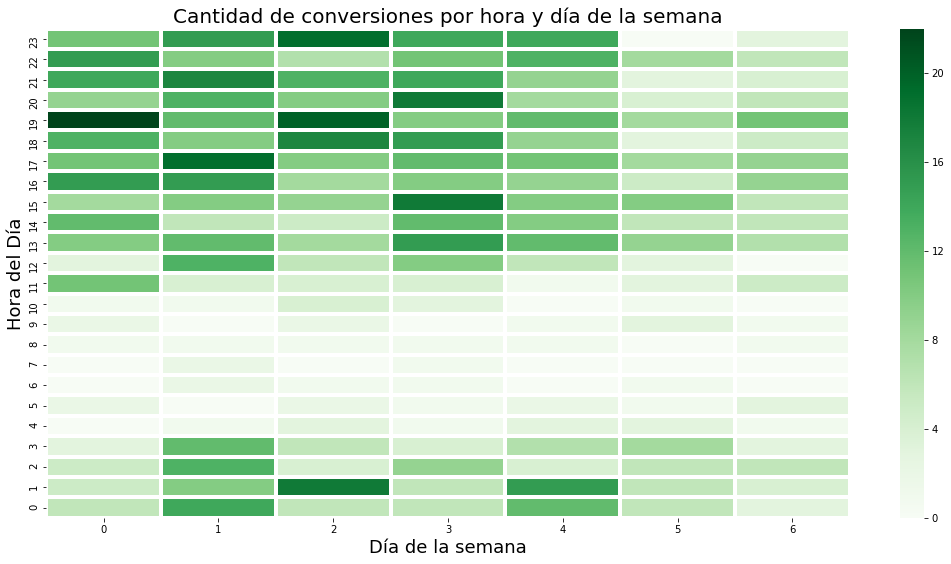

In [12]:
plot_heatmap(conversion,'Cantidad de conversiones por hora y día de la semana','Hora del Día','Día de la semana')

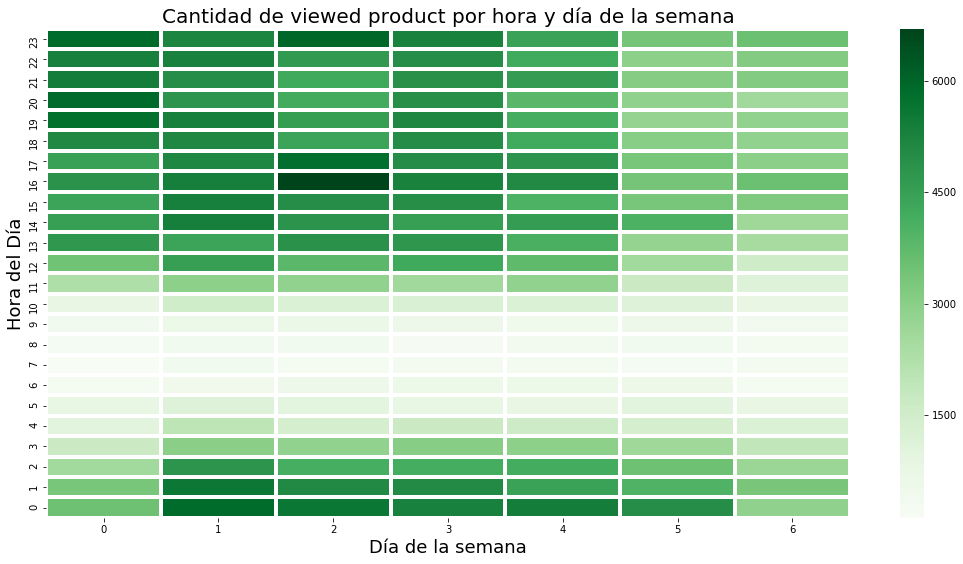

In [13]:
viewed = per_event_hour_weekday.loc['viewed product'].transpose()
viewed.sort_index(ascending=False,inplace=True)
plot_heatmap(viewed,'Cantidad de viewed product por hora y día de la semana','Hora del Día','Día de la semana')

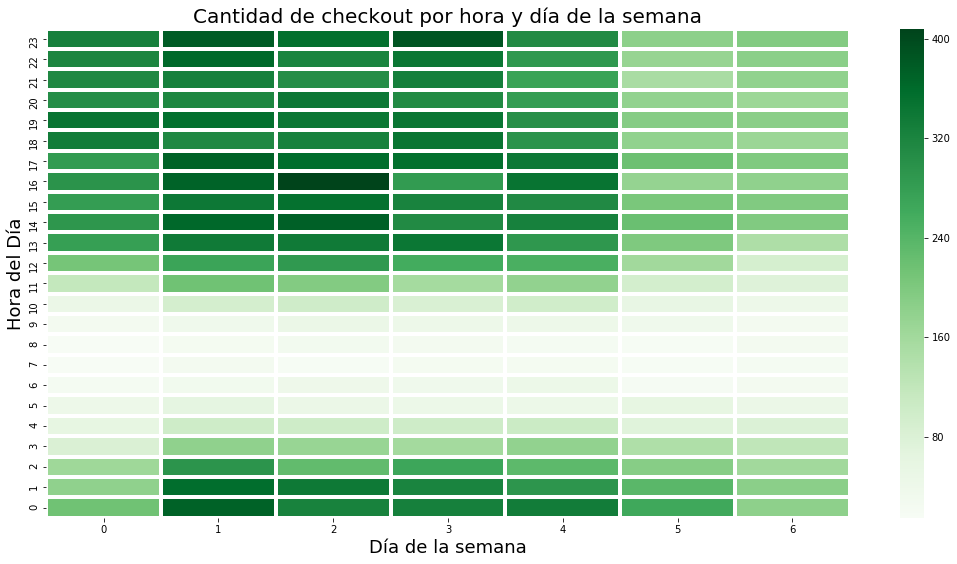

In [14]:
checkout = per_event_hour_weekday.loc['checkout'].transpose()
checkout.sort_index(ascending=False,inplace=True)
plot_heatmap(checkout,'Cantidad de checkout por hora y día de la semana','Hora del Día','Día de la semana')

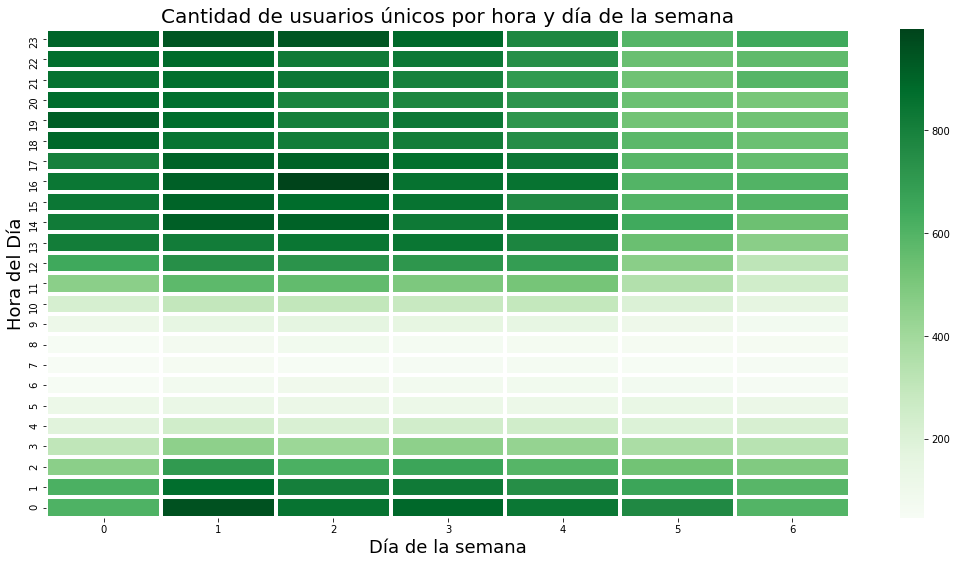

In [15]:
#todos los eventos, usuarios únicos
per_date_total = events.groupby(['weekday','hour']).agg({'person':'nunique'}).unstack()
per_date_total.columns = per_date_total.columns.droplevel(0)
per_date_total.fillna(value=0,inplace=True)
per_date_total = per_date_total.astype(dtype='int64')
unique_users = per_date_total.transpose()
unique_users.sort_index(ascending=False,inplace=True)
plot_heatmap(unique_users,'Cantidad de usuarios únicos por hora y día de la semana','Hora del Día','Día de la semana')

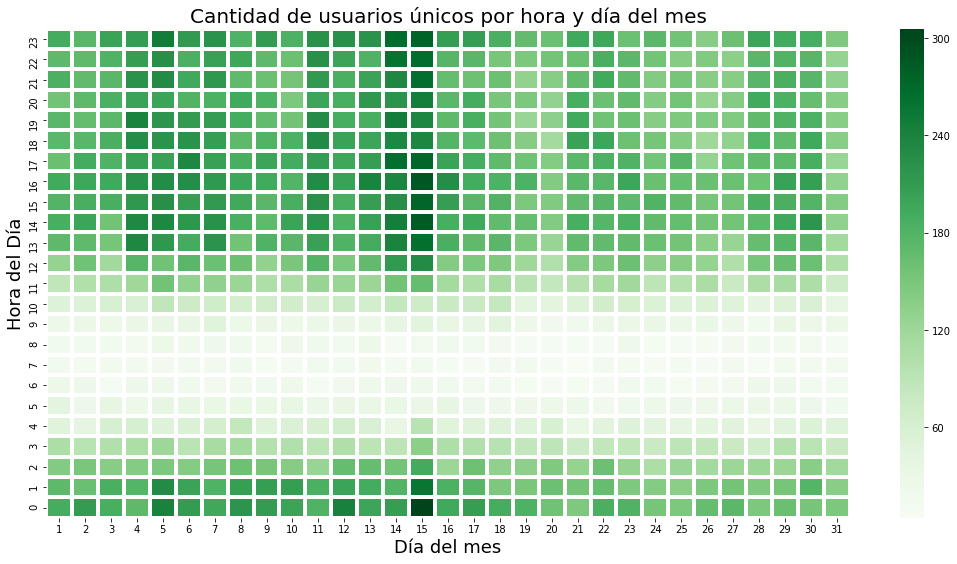

In [24]:
heatmap_unique_users_between_dates()

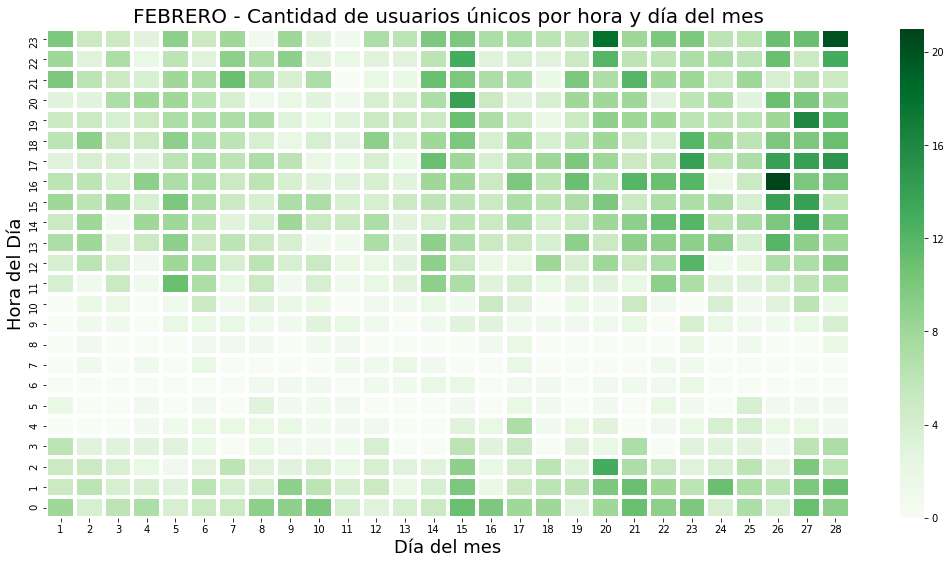

In [31]:
heatmap_unique_users_between_dates(desde='2018-02-01 00:00:00',hasta='2018-03-01 00:00:00',title='FEBRERO - Cantidad de usuarios únicos por hora y día del mes')

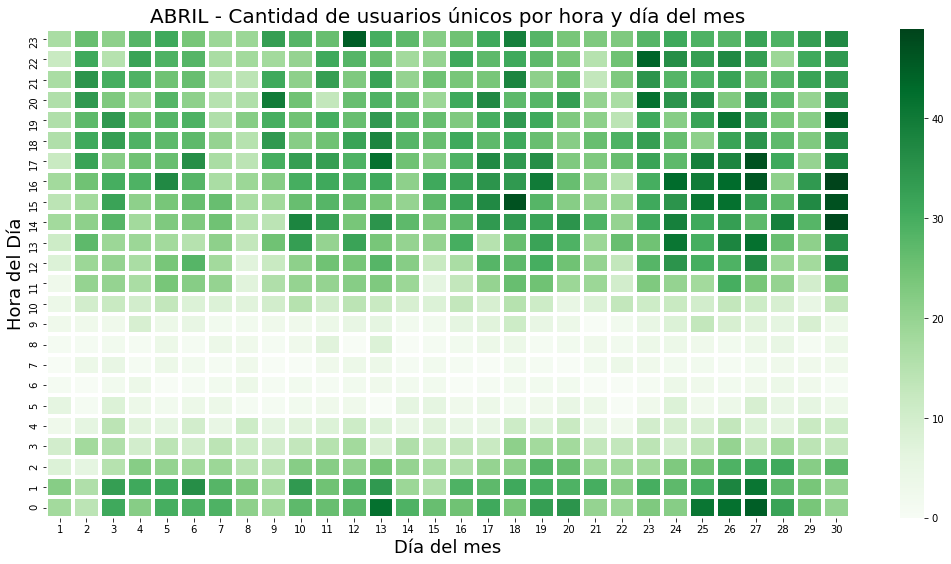

In [32]:
heatmap_unique_users_between_dates(desde='2018-04-01 00:00:00',hasta='2018-05-01 00:00:00',title='ABRIL - Cantidad de usuarios únicos por hora y día del mes')

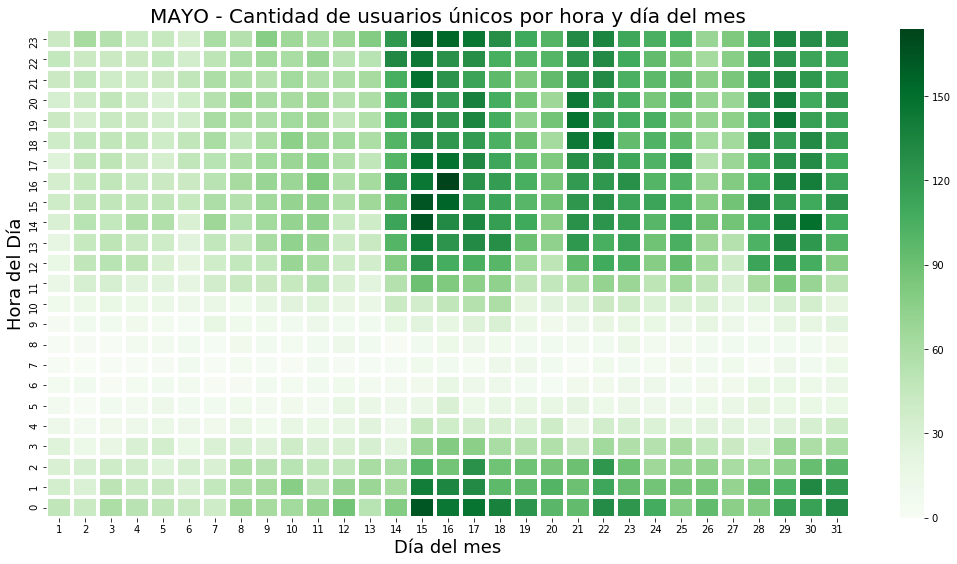

In [33]:
heatmap_unique_users_between_dates(desde='2018-05-01 00:00:00',hasta='2018-06-01 00:00:00',title='MAYO - Cantidad de usuarios únicos por hora y día del mes')

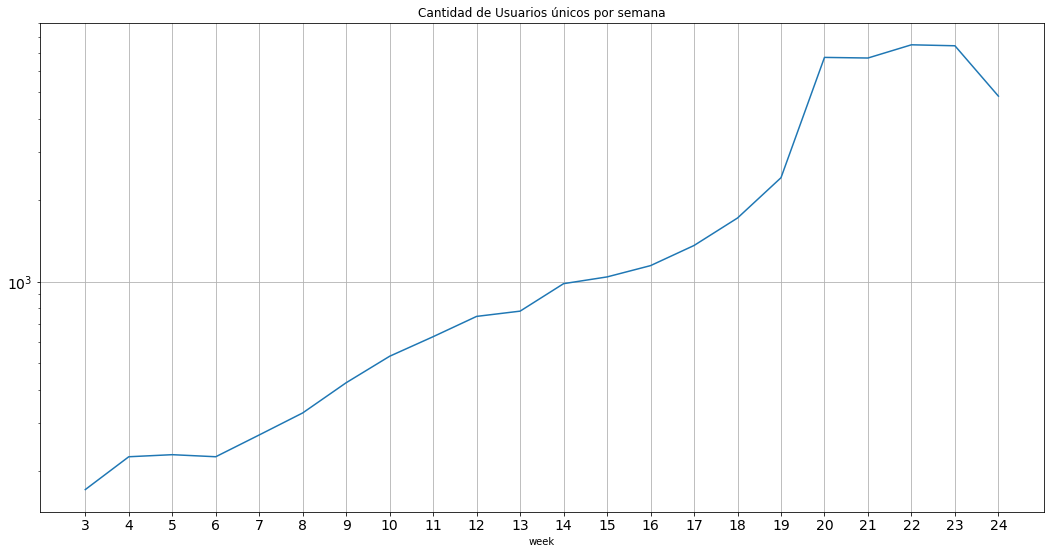

In [63]:
per_week_total_unique = events.groupby(['week']).agg({'person':'nunique'}).unstack()
per_week_total_unique.index = per_week_total_unique.index.droplevel(0)
logy = True
graph = per_week_total_unique.plot(logy=logy,figsize=(18,9),grid=True,title='Cantidad de Usuarios únicos por semana',fontsize=14,xticks=per_week_total_unique.index)

A partir del gráfico anterior, podemos determinar que durante la semana 19 (mayo) el tráfico en el sitio aumentó estrepitosamente.
Al graficar con escala logarítmica notamos que este crecimiento abrupto se detiene en la semana 22 y llega en la semana 24 a los mismos niveles que hubiera tenido si continuaba con la misma pendiente de crecimiento (exponencial) que tenìa hasta el punto de quiebre de la semana 19.
Cabría analizar la raíz de este fenómeno y ver sus resultados distinguiendo por categorías (otro notebook).